## Data Exploration

This notebook tries to explore the dataset provided for the Classification Problem. We initially import the required libraries. The go ahead with the no of rows and columns. The columns and there meaning. Further we see how many unique column values exist and try to remove na values from the columns. Then we go forward with the top words of the text column. At the end we extract the nouns using two methods and save the df to a 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np  
from collections import Counter
%matplotlib inline
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS 

In [62]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
df = pd.read_csv('data/bible_data_set.csv',sep='\t')

In [64]:
print(df.shape)

(31102, 5)


In [65]:
print(df.columns)

Index(['citation', 'book', 'chapter', 'verse', 'text'], dtype='object')


In [66]:
print(df.head())

      citation     book  chapter  verse  \
0  Genesis 1:1  Genesis        1      1   
1  Genesis 1:2  Genesis        1      2   
2  Genesis 1:3  Genesis        1      3   
3  Genesis 1:4  Genesis        1      4   
4  Genesis 1:5  Genesis        1      5   

                                                text  
0  In the beginning God created the heaven and th...  
1  And the earth was without form, and void; and ...  
2  And God said, Let there be light: and there wa...  
3  And God saw the light, that it was good: and G...  
4  And God called the light Day, and the darkness...  


In [67]:
for column in df:
    if df[column].isnull().sum() != 0:
        print("Filling " + df[column].isnull().sum() + " NA's in"+column)
        df[column] = df[column].fillna("")
    print(column + "\t" + str(np.unique(df[column]).shape[0]))

citation	31102
book	66
chapter	150
verse	176
text	30834


In [68]:
df['testment'] = df.apply(lambda row: 1 if row.book in ot else 0, axis=1)    

In [69]:
stops = stopwords.words('english')
def topWords(col,val): 
    filtered_words = [word for word in Counter(" ".join(col).split()).most_common(len(col)) if word[0].strip().lower() not in stops]
    return filtered_words[:val]
def wordCloud(col,val):
    d = {}
    for a, x in Counter(" ".join(col).split()).most_common(val):
        if a.lower() not in stopWords:
            d[a] = x
    wordcloud = WordCloud(background_color="white", margin=5)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [70]:
lines = [line.rstrip('\n') for line in open('data/bible_map.txt')]
for line in lines:
    if len(line.strip().split('=')) > 1:
        print(line.strip().split('=')[1])

 ['Genesis','Exodus','Leviticus','Numbers','Deuteronomy','Joshua','Judges','Ruth','1 Samuel','2 Samuel','1 Kings','2 Kings','1 Chronicles','2 Chronicles','Ezra','Nehemiah','Esther','Job','Psalms','Proverbs','Ecclesiastes','Song of Solomon','Isaiah','Jeremiah','Lamentations','Ezekiel','Daniel','Hosea','Joel','Amos','Obadiah','Jonah','Micah','Nahum','Habakkuk','Zephaniah','Haggai','Zechariah','Malachi']
 ['Matthew','Mark','Luke','John','Acts','Romans','1 Corinthians','2 Corinthians','Galatians','Ephesians','Philippians','Colossians','1 Thessalonians','2 Thessalonians','1 Timothy','2 Timothy','Titus','Philemon','Hebrews','James','1 Peter','2 Peter','1 John','2 John','3 John','Jude','Revelation']


In [71]:
ot = lines[0].strip().split('=')[1].strip().replace('[', '').replace(']', '').replace("'",'').split(",")
nt = lines[1].strip().split('=')[1].strip().replace('[', '').replace(']', '').replace("'",'').split(",")

In [72]:
print(ot)

['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', 'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes', 'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk', 'Zephaniah', 'Haggai', 'Zechariah', 'Malachi']


In [73]:
print(len(ot))
print(len(nt))

39
27


In [74]:
print(len(df['book']))
print(len(df[df['book'].isin(ot)]['citation']))
print(len(df[df['book'].isin(nt)]['citation']))

31102
23145
7957


In [75]:
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [76]:
print(topWords(df[df['book'].isin(ot)]['text'],10))
print(topWords(df[df['book'].isin(nt)]['text'],10))

[('shall', 8351), ('unto', 6503), ('thy', 4053), ('thou', 3927), ('LORD', 3910), ('upon', 2458), ('ye', 2164), ('king', 1708), ('hath', 1677), ('said', 1619)]
[('unto', 2427), ('shall', 1409), ('ye', 1401), ('him,', 868), ('Jesus', 775), ('thou', 702), ('man', 668), ('God', 666), ('said', 662), ('them,', 544)]


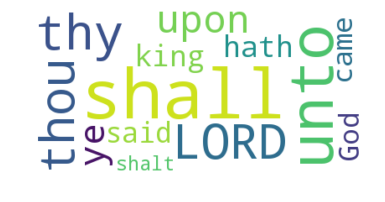

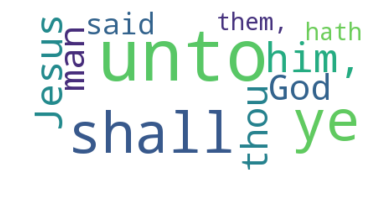

In [77]:
wordCloud(df[df['book'].isin(ot)]['text'],50)
wordCloud(df[df['book'].isin(nt)]['text'],50)

In [78]:
print(df['text'][0])

In the beginning God created the heaven and the earth. 



In [79]:
blob = TextBlob(df['text'][0])
print(blob.noun_phrases)

['god']


In [80]:
is_noun = lambda pos: pos[:2] == 'NN'
tokenized = nltk.word_tokenize(df['text'][0])
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
print(nouns)

['beginning', 'God', 'heaven', 'earth']


In [81]:
df['nounTextBlob'] = df.apply(lambda row: set(TextBlob(row.text).noun_phrases), axis=1)

In [82]:
df['nounNLTK'] = df.apply(lambda row: set([word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(row.text)) if is_noun(pos)]), axis=1)

In [83]:
print(df.head())

      citation     book  chapter  verse  \
0  Genesis 1:1  Genesis        1      1   
1  Genesis 1:2  Genesis        1      2   
2  Genesis 1:3  Genesis        1      3   
3  Genesis 1:4  Genesis        1      4   
4  Genesis 1:5  Genesis        1      5   

                                                text  testment  \
0  In the beginning God created the heaven and th...         1   
1  And the earth was without form, and void; and ...         1   
2  And God said, Let there be light: and there wa...         1   
3  And God saw the light, that it was good: and G...         1   
4  And God called the light Day, and the darkness...         1   

       nounTextBlob                                           nounNLTK  
0             {god}                    {earth, God, beginning, heaven}  
1     {god, spirit}  {God, waters, void, face, Spirit, darkness, ea...  
2             {god}                                       {God, light}  
3             {god}                             {dar

In [84]:
df.to_csv('data/bible_data_set_full.csv', sep='\t', encoding='utf-8')